In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Eartquakes-1990-2023.csv")

In [ ]:
print(df.columns)

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

In [ ]:
df.date = pd.to_datetime(df.date)

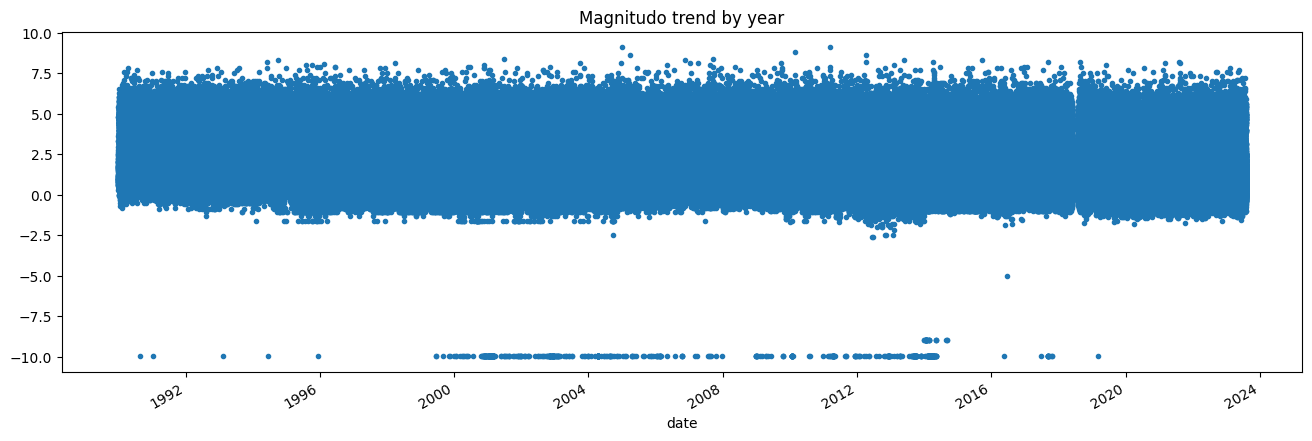

In [ ]:
d = df.set_index("date")

d["magnitudo"].plot(kind = "line", style = ".", title ="Magnitudo trend by year", figsize =(16,5))
plt.show()

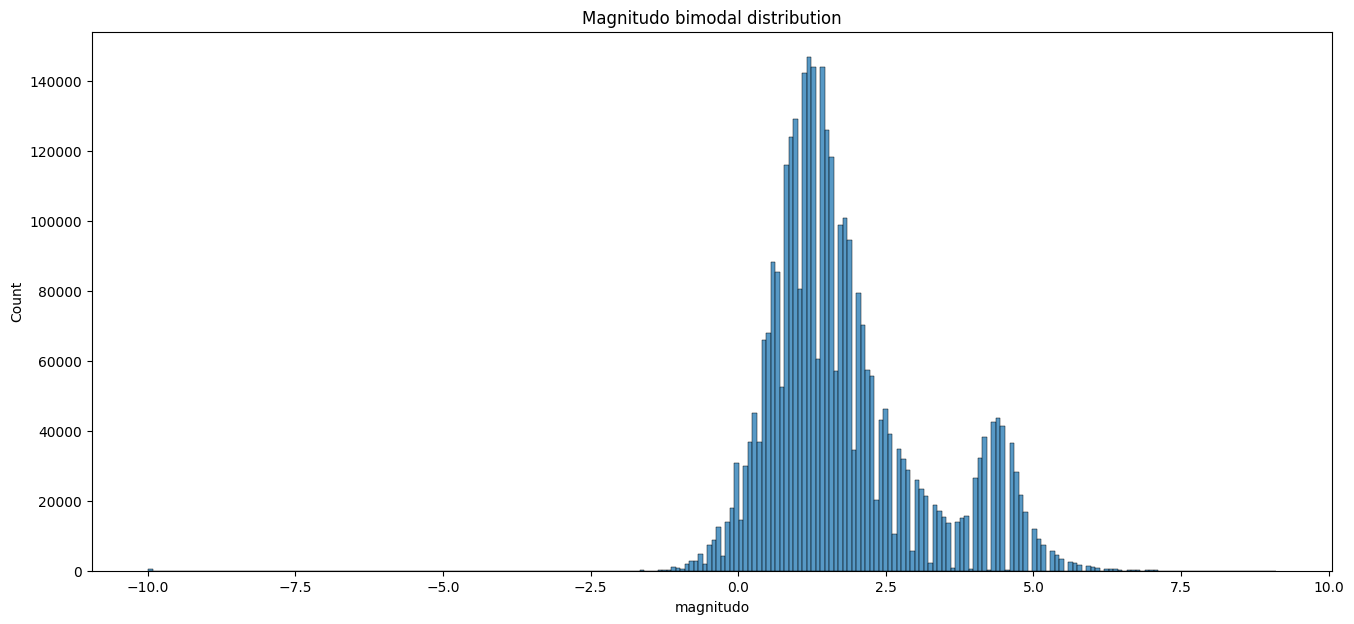

In [ ]:
plt.figure(figsize = (16,7))
sns.histplot(df["magnitudo"], bins = 250)
plt.title("Magnitudo bimodal distribution")
plt.show()

In [ ]:
def filter_plot_day(df, date_1,date_2):
    """ Return a map plot filtered by date"""
    df.copy()
    df = df.loc[(df.date > date_1) & (df.date < date_2)]
    fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='magnitudo', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        title =f"<br> Eartquake magnitudo beetween {date_1} and {date_2}")
    fig.update_layout(mapbox_style="open-street-map")
    fig.show()

filter_plot_day(df, date_1 = "2023-02-01", date_2 ="2023-02-02")

#Let's extrapolate some feature from the date

In [ ]:
def transform_date(df):
    df = df.copy()
    df["hour"] = df.date.dt.hour
    df["day_of_month"] = df.date.dt.day
    df["weekday"] = df.date.dt.day_name()
    df["month"] = df.date.dt.month
    df["month_name"] = df.date.dt.month_name()
    df["year"] =df.date.dt.year
    return df

In [ ]:
df = transform_date(df)

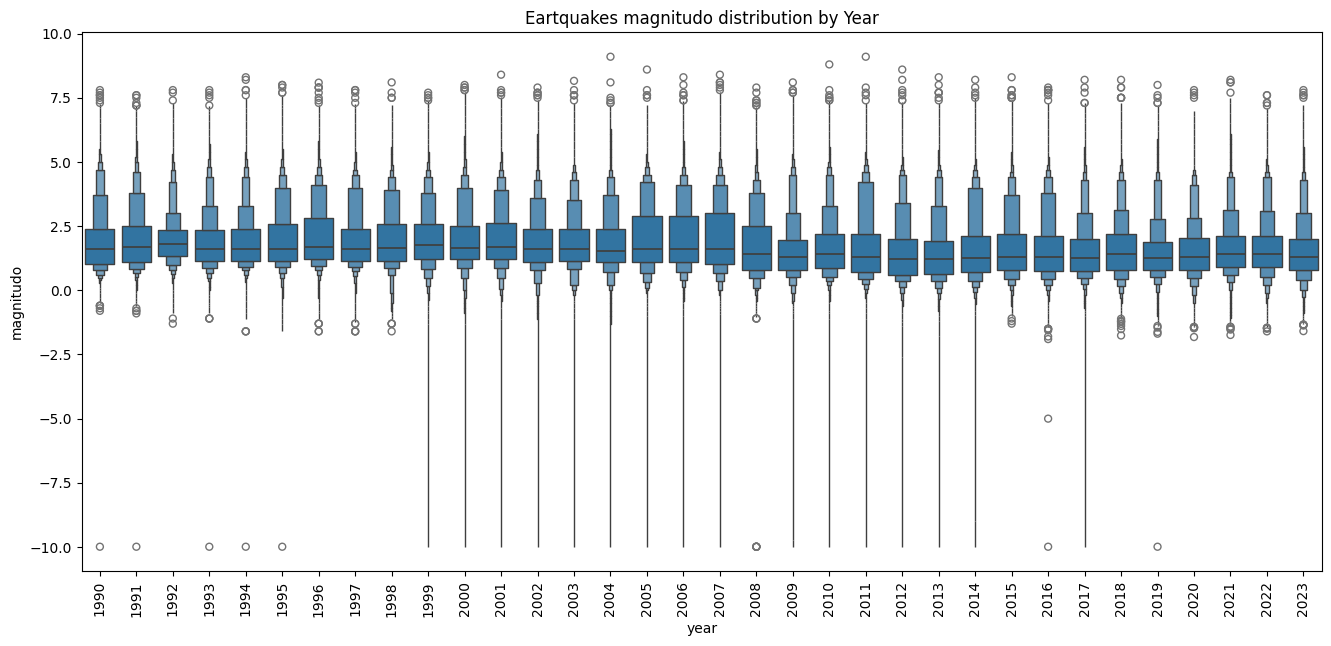

In [ ]:
plt.figure(figsize=(16,7))
sns.boxenplot(df,x="year", y="magnitudo",linewidth=1 )
plt.xticks(rotation=90)
plt.title("Eartquakes magnitudo distribution by Year")
plt.show()

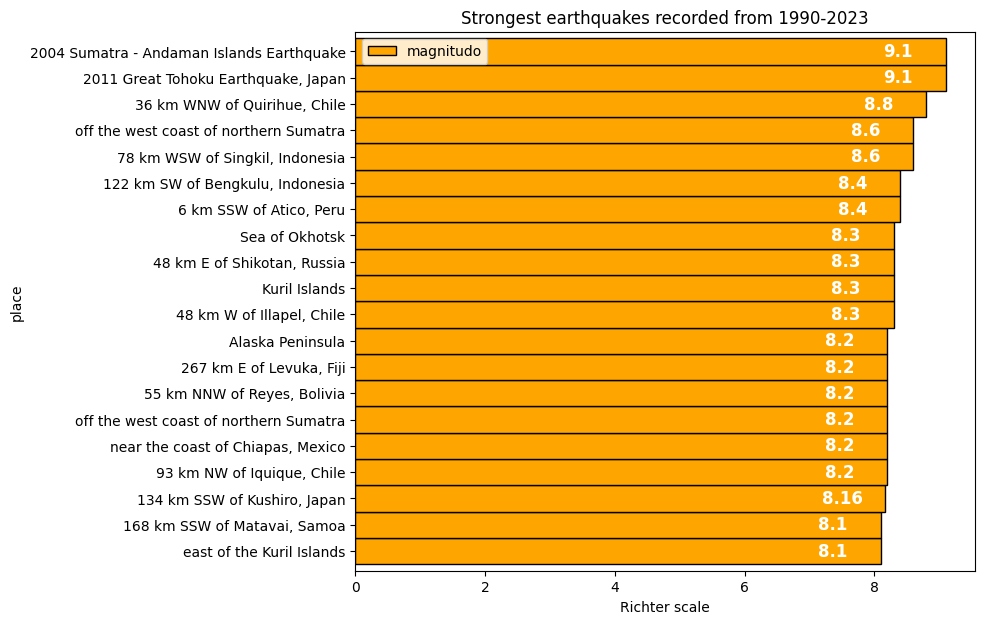

In [ ]:
top_mag = df.sort_values(by="magnitudo", ascending = False).head(20)

plot = top_mag.sort_values(by="magnitudo").plot(x="place",y="magnitudo", kind ="barh",width=1, edgecolor="black",figsize =(8,7),color = "orange")
for bars in plot.containers:
        plot.bar_label(bars, padding=-45, fontsize=12, color="white", weight="bold")
plt.title("Strongest earthquakes recorded from 1990-2023")
plt.xlabel("Richter scale")
plt.show()

In [ ]:
def plot_strongest(df):
    gb_top = df.groupby(["state"])\
               .agg({"significance":"max", "magnitudo":"max"})\
               .reset_index()

    b = df[["year", "state","significance","longitude", "latitude","magnitudo"]]
    merge = pd.merge(gb_top, b, how = "left", on =["state","significance", "magnitudo"]).sort_values(by="year")


    fig = px.scatter_geo(merge,
                         lat="latitude", lon="longitude",
                         size="significance",
                         animation_frame="year",
                         projection="natural earth",
                         title = "Strongest eartquake by year")
    fig.show()

plot_strongest(df)